In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn
sklearn.__version__

'1.3.0'

In [2]:
import csv
df = pd.read_csv('./bank/bank-full.csv', sep=';')

In [3]:
import matplotlib
%matplotlib inline

In [4]:
# below javascript: make the plot window larger

In [5]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [6]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## no null data in df (but there are "unknown" categories)

In [8]:
train, test = train_test_split(df, test_size=0.2, random_state=23)

In [9]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no


In [10]:
# get the columns, non-null count, and Dtype
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 9419 to 41555
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        36168 non-null  int64 
 1   job        36168 non-null  object
 2   marital    36168 non-null  object
 3   education  36168 non-null  object
 4   default    36168 non-null  object
 5   balance    36168 non-null  int64 
 6   housing    36168 non-null  object
 7   loan       36168 non-null  object
 8   contact    36168 non-null  object
 9   day        36168 non-null  int64 
 10  month      36168 non-null  object
 11  duration   36168 non-null  int64 
 12  campaign   36168 non-null  int64 
 13  pdays      36168 non-null  int64 
 14  previous   36168 non-null  int64 
 15  poutcome   36168 non-null  object
 16  y          36168 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.0+ MB


In [11]:
# describe the numeric features: count, mean, std, min, max, percentiles
train.describe()

,age,balance,day,duration,campaign,pdays,previous
count,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000,36168.000000
mean,40.918768,1357.402372,15.818348,257.184638,2.775630,40.386889,0.580900
std,10.634546,3050.468682,8.335164,255.383308,3.130953,100.337503,2.399685
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,73.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,179.000000,2.000000,-1.000000,0.000000
75%,48.000000,1423.000000,21.000000,318.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,854.000000,275.000000


In [12]:
# get a summary of previous info using skimpy
from skimpy import skim
skim(train)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 36168  │ │ string      │ 10    │                                                          │
│ │ Number of columns │ 17     │ │ int64       │ 7     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %    ┃ mean    ┃ sd      ┃ p0       ┃ p25   ┃ p75     ┃ p100      ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ age               │    0 │       0 │      41 │      11 │       18 │    33 │      48 │        95 │   ▃█▅▁   │  │
│ │ balance           │    0 │       0 │    1400 │    3100 │    -8000 │    73 │    1400 │    100000 │    █     │  │
│ │ day               │    0 │       0 │      16 │     8.3 │        1 │     8 │      21 │        31 │  ▅▆▆█▄▆  │  │
│ │ duration          │    0 │       0 │     260 │     260 │        0 │   100 │     320 │      4900 │    █     │  │
│ │ campaign          │    0 │       0 │     2.8 │     3.1 │        1 │     1 │       3 │        63 │    █     │  │
│ │ pdays             │    0 │       0 │      40 │     100 │       -1 │    -1 │      -1 │       850 │   █▁▁    │  │
│ │ previous          │    0 │       0 │    0.58 │     2.4 │        0 │     0 │       0 │       280 │    █     │  │
│ └───────────────────┴──────┴─────────┴─────────┴─────────┴──────────┴───────┴─────────┴───────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ job                       │       0 │          0 │                            1 │                    36168 │  │
│ │ marital                   │       0 │          0 │                            1 │                    36168 │  │
│ │ education                 │       0 │          0 │                            1 │                    36168 │  │
│ │ default                   │       0 │          0 │                            1 │                    36168 │  │
│ │ housing                   │       0 │          0 │                            1 │                    36168 │  │
│ │ loan                      │       0 │          0 │                            1 │                    36168 │  │
│ │ contact                   │       0 │          0 │                            1 │                    36168 │  │
│ │ month                     │       0 │          0 │                            1 │                    36168 │  │
│ │ poutcome                  │       0 │          0 │                            1 │                    36168 │  │
│ │ y                         │       0 │          0 │                            1 │                    36168 │  │
│ └───────────────────────────┴─────────┴────────────┴──

## 7 numeric variables, 9 categorical variables

In [13]:
# column names
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [14]:
# separate numeric variables and categorical variables
from pandas.api.types import is_numeric_dtype, is_string_dtype
num_cols = []
cat_cols = []
for col in train.columns:
    if is_numeric_dtype(train[col]):
        num_cols.append(col)
    elif is_string_dtype(train[col]):
        cat_cols.append(col)
        
print(num_cols)
cat_cols.remove('y')
print(cat_cols)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [15]:
# get a summary of y
train.y.value_counts()

y
no     31952
yes     4216
Name: count, dtype: int64

In [16]:
train.age

9419     36
26837    31
25178    57
17148    31
17412    38
         ..
9704     39
11190    55
26569    39
9256     51
41555    46
Name: age, Length: 36168, dtype: int64

In [17]:
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)


# problem: find potential customers and do phone call campaign. 
# target: do better than random guess, which yields base rate: 0.117
# metric: precision, pr_auc
# ideal results: precision better than base rate

In [79]:
class FeatureSelector(object):
    def __init__(self, selected_features):
        self.selected_features = selected_features
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)
        

## 1. logistic regression: train_cv_max-pr_auc: 0.56, test-pr_auc: 0.56

In [18]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]




In [19]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no,0
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no,0
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no,0
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no,0
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no,0
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no,0
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no,0
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no,0


In [27]:
from sklearn.preprocessing import OneHotEncoder
class RawDataTransformer(object):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X1 = X.copy()
        
        #ordinal encoding for binary: yes-1, no-0
        le_cols = ['default', 'housing', 'loan']
        for col in le_cols:
            X1[col+'_le'] = X1[col].map(self.num_yes_no)
            X1 = X1.drop([col], axis=1)
        
        #One-hot-encoding:
        ohe_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
        for col in ohe_cols:
            ohe = OneHotEncoder()
            transformed = ohe.fit_transform(X1[[col]])
            X1[col + '_' + ohe.categories_[0]] = transformed.toarray()
            X1 = X1.drop([col], axis=1)  
            
      #  X1 = X1.drop(['y', 'y_num'], axis=1)
        return X1


    def num_yes_no(self, x):
        if x=='yes':
            return 1
        else:
            return 0
        
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

In [28]:
## fine tune the hyperparameters.  GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

#cunsum_threshold = 1.01
#features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cunsum_threshold]
#selected_features = features = list(features)

steps = [
    ('rdt', RawDataTransformer()),
   # ('fs', FeatureSelector(selected_features = selected_features)),
    ('scale', StandardScaler()),
   # ('pca', PCA()),
    ('lg', LogisticRegression(
        #class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=Pipeline(steps)

params = {
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    'lg__C': [ 2e-3, 5e-3, 8e-3, ],
    'lg__class_weight': [None, 'balanced'],
    'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

# best_params = {'lg__C': 0.005, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, params , cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1
                 )


grid.fit(X_train, y_train)



/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1222: UserWarning: 'n_jobs' > 1 does not have any

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x13f5869b0>),
                                       ('scale', StandardScaler()),
                                       ('lg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1,
                                                           random_state=15))]),
             n_jobs=-1,
             param_grid={'lg__C': [0.002, 0.005, 0.008],
                         'lg__class_weight': [None, 'balanced'],
                         'lg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']},
             scoring='average_precision')

In [29]:
#import sklearn
#sklearn.metrics.get_scorer_names()

In [30]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.552


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

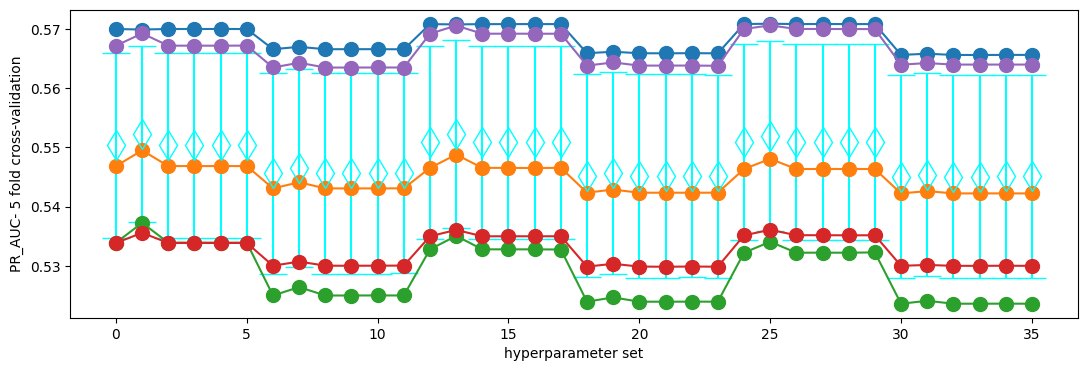

In [32]:
import matplotlib.pylab as plt
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [33]:
grid.best_params_

{'lg__C': 0.002, 'lg__class_weight': None, 'lg__solver': 'liblinear'}

In [37]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.5561866364357902 0.9104398951800846


In [107]:
threshold

array([0.00433904, 0.00789154, 0.00795047, ..., 0.99864313, 0.99964384,
       0.99981171])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.556')

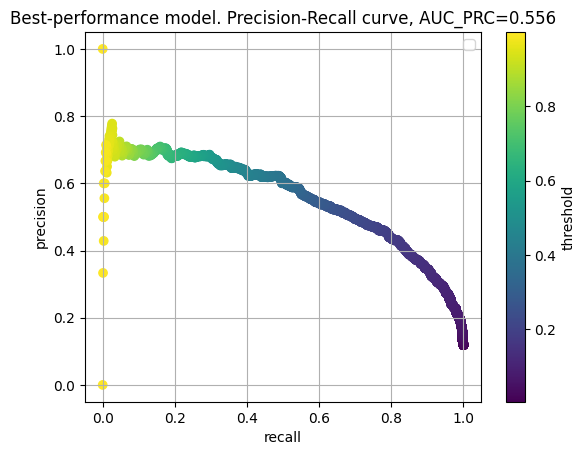

In [38]:

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.556')

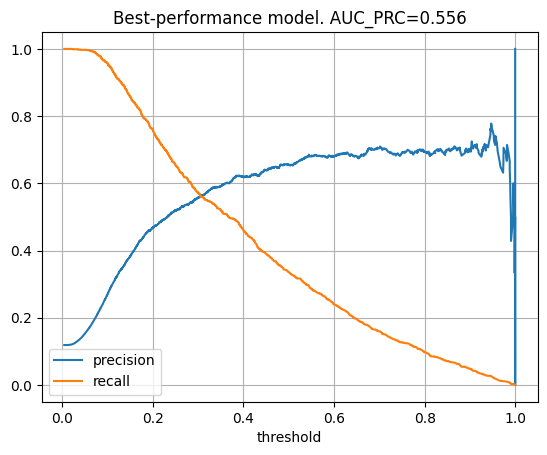

In [39]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [40]:
# this is how to access individual steps and its attributes of GridSearchCV. 
grid.best_estimator_['lg'].n_features_in_
grid.best_estimator_['scale'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

array(['age', 'balance', 'day', 'duration', 'campaign', 'pdays',
       'previous', 'default_le', 'housing_le', 'loan_le', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_primary', 'education_secondary',
       'education_tertiary', 'education_unknown', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

In [41]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
9419,unemployed,married,secondary,no,no,no,unknown,jun,unknown,36,1453,6,386,1,-1,0
26837,admin.,married,secondary,no,yes,no,cellular,nov,unknown,31,2304,20,257,2,-1,0
25178,management,divorced,tertiary,no,no,no,cellular,nov,unknown,57,236,18,120,2,-1,0
17148,entrepreneur,married,tertiary,no,yes,no,cellular,jul,unknown,31,5156,28,147,3,-1,0
17412,blue-collar,single,unknown,no,yes,no,cellular,jul,unknown,38,-933,28,149,11,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,technician,single,unknown,no,no,no,unknown,jun,unknown,39,75,6,26,1,-1,0
11190,blue-collar,married,primary,no,no,no,unknown,jun,unknown,55,761,18,67,1,-1,0
26569,management,married,tertiary,no,no,no,cellular,nov,unknown,39,2450,20,382,2,-1,0
9256,technician,married,primary,no,yes,no,unknown,jun,unknown,51,223,5,131,3,-1,0


In [43]:
grid.best_estimator_['lg'].n_features_in_

48

In [44]:
columns = selected_features
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(grid.best_estimator_['lg'].coef_[0, :])), grid.best_estimator_['lg'].coef_[0, :]) 
plt.xticks(range(len(grid.best_estimator_['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables, final model')

NameError: name 'selected_features' is not defined

0.10.1


Counter({0: 31952, 1: 31952})

# 

# 1.1 final model with smote -- for this dataset using smote did not improve the score, but make the score lower. train_cv_max-pr_auc: 0.54, test-pr_auc: 0.54

In [997]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]




In [998]:
train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_num
9419,36,unemployed,married,secondary,no,1453,no,no,unknown,6,jun,386,1,-1,0,unknown,no,0
26837,31,admin.,married,secondary,no,2304,yes,no,cellular,20,nov,257,2,-1,0,unknown,no,0
25178,57,management,divorced,tertiary,no,236,no,no,cellular,18,nov,120,2,-1,0,unknown,no,0
17148,31,entrepreneur,married,tertiary,no,5156,yes,no,cellular,28,jul,147,3,-1,0,unknown,no,0
17412,38,blue-collar,single,unknown,no,-933,yes,no,cellular,28,jul,149,11,-1,0,unknown,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,39,technician,single,unknown,no,75,no,no,unknown,6,jun,26,1,-1,0,unknown,no,0
11190,55,blue-collar,married,primary,no,761,no,no,unknown,18,jun,67,1,-1,0,unknown,no,0
26569,39,management,married,tertiary,no,2450,no,no,cellular,20,nov,382,2,-1,0,unknown,no,0
9256,51,technician,married,primary,no,223,yes,no,unknown,5,jun,131,3,-1,0,unknown,no,0


In [1057]:
## fine tune the hyperparameters.  GridSearchCV
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.decomposition import PCA

import imblearn
from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.pipeline import Pipeline as imbpipeline

cunsum_threshold = 1.01
features = feature_importance.features[feature_importance['coef_abs_cumsum_pct']<cunsum_threshold]
selected_features = features = list(features)

steps = [
    ('rdt', RawDataTransformer()),
    ('fs', FeatureSelector(selected_features = selected_features)),
    ('smote', SMOTE(random_state=11)),
    ('scale', StandardScaler()),
   # ('pca', PCA()),
    ('lg', LogisticRegression(
        #class_weight='balanced', 
        random_state=15, n_jobs=-1, max_iter=200)),
]

model=imbpipeline(steps)

params = {
   # 'pca__n_components': [None, 45, 42],
   # 'lg__penalty': ['l2', None],
    'lg__C': [ 0.04, 0.08, 0.1, ],
   # 'lg__class_weight': [None, 'balanced'],
    'lg__solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
}

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, params , cv=cv, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1
                 )


grid.fit(X_train, y_train)



/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn(
/Users/miaoli/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x1779f7820>),
                                       ('fs',
                                        <__main__.FeatureSelector object at 0x2a163dae0>),
                                       ('smote', SMOTE(random_state=11)),
                                       ('scale', StandardScaler()),
                                       ('lg',
                                        LogisticRegression(max_iter=200,
                                                           n_jobs=-1,
                                                           random_state=15))]),
             n_jobs=-1,
             param_grid={'lg__C': [0.04, 0.08, 0.1],
                         'lg__solver': ['lbfgs', 'liblinear', 'newton-cg',
                                        'newton-cholesky', 'sag', 'saga']},
             scoring='average_precision')

In [1058]:
#import sklearn
#sklearn.metrics.get_scorer_names()

In [1059]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.530


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

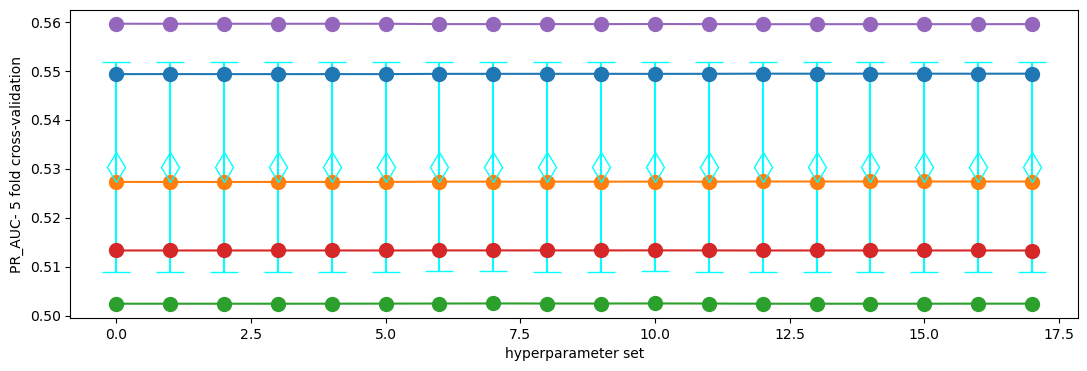

In [1060]:
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [1061]:
grid.best_params_

{'lg__C': 0.08, 'lg__solver': 'sag'}

In [1062]:
y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.5391714431867853 0.8968200883789514


In [1063]:
threshold

array([2.85359155e-06, 1.37574429e-05, 1.43482853e-05, ...,
       9.99999867e-01, 9.99999941e-01, 9.99999999e-01])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.539')

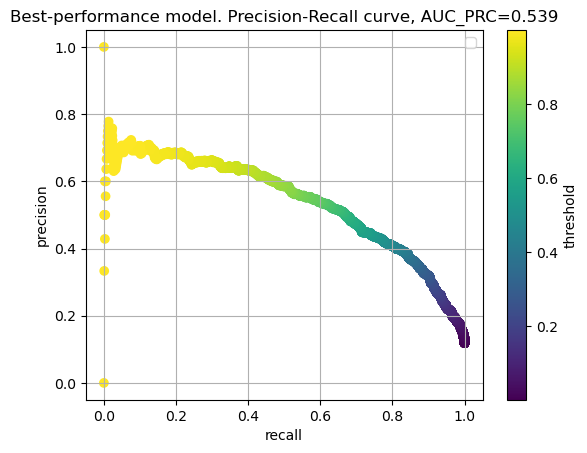

In [1064]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.539')

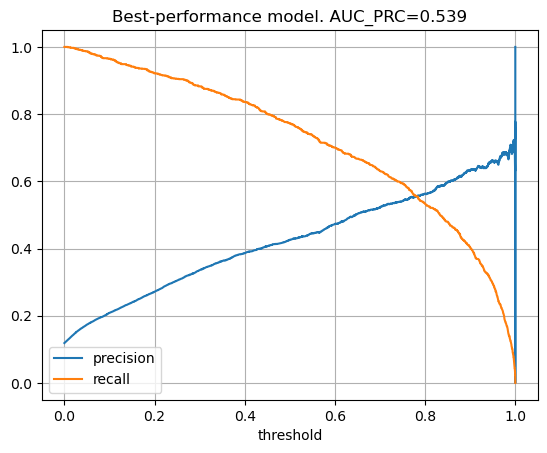

In [1065]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [1066]:
# this is how to access individual steps and its attributes of GridSearchCV. 
print(grid.best_estimator_['smote'].n_features_in_)
grid.best_estimator_['smote'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

48


array(['duration', 'contact_unknown', 'poutcome_success', 'housing_le',
       'contact_cellular', 'month_mar', 'campaign', 'month_oct',
       'month_jun', 'loan_le', 'contact_telephone', 'month_may',
       'month_sep', 'month_jul', 'month_apr', 'balance', 'job_student',
       'month_feb', 'job_retired', 'marital_single', 'month_nov', 'pdays',
       'job_blue-collar', 'month_jan', 'poutcome_failure',
       'poutcome_unknown', 'marital_married', 'month_aug',
       'education_primary', 'education_unknown', 'job_entrepreneur',
       'job_admin.', 'month_dec', 'previous', 'job_services',
       'education_tertiary', 'job_unknown', 'job_management',
       'default_le', 'marital_divorced', 'job_housemaid',
       'poutcome_other', 'day', 'job_unemployed', 'age',
       'job_self-employed', 'education_secondary', 'job_technician'],
      dtype=object)

In [1069]:
grid.best_estimator_['lg'].coef_

array([[ 9.18493780e-01, -2.91473826e-01,  3.44028334e-01,
        -2.50016594e-01,  2.36822302e-01,  1.78148812e-01,
        -1.73047538e-01,  1.41613159e-01,  1.66497040e-01,
        -1.23010002e-01,  7.71427485e-02, -2.87822091e-02,
         1.36404749e-01, -1.22823117e-01,  7.19340586e-02,
         4.37993779e-02,  7.22193622e-02,  4.28938600e-02,
         7.82692360e-02,  5.69256816e-02, -9.83026763e-02,
        -4.02029213e-03, -6.04475933e-02, -1.05569440e-01,
        -6.17152640e-02, -1.09497331e-01, -6.17794568e-02,
        -9.68690597e-02, -4.56167169e-02,  6.44915644e-03,
        -2.88709213e-02,  2.98699419e-02,  6.38375204e-02,
         2.30134967e-02, -1.12982954e-02,  5.34742370e-02,
        -1.41373391e-02,  1.34852563e-02, -6.68138515e-03,
         1.44474222e-02, -4.25893026e-02, -8.59269847e-04,
         4.82240043e-02,  9.59946778e-03, -5.77548452e-03,
        -2.27899295e-02, -1.86088332e-02,  4.21950682e-03]])

In [1091]:
# linear correlation coefs of the variables to y:
df2 = grid.best_estimator_['fs'].transform(grid.best_estimator_['rdt'].transform(df))
df2['y_num'] = df.y.map(lambda x: 1 if x=='yes' else 0)
df2

,duration,contact_unknown,poutcome_success,housing_le,contact_cellular,month_mar,campaign,month_oct,month_jun,loan_le,...,marital_divorced,job_housemaid,poutcome_other,day,job_unemployed,age,job_self-employed,education_secondary,job_technician,y_num
0,261,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,58,0.0,0.0,0.0,0
1,151,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,44,0.0,1.0,1.0,0
2,76,1.0,0.0,1,0.0,0.0,1,0.0,0.0,1,...,0.0,0.0,0.0,5,0.0,33,0.0,1.0,0.0,0
3,92,1.0,0.0,1,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,47,0.0,0.0,0.0,0
4,198,1.0,0.0,0,0.0,0.0,1,0.0,0.0,0,...,0.0,0.0,0.0,5,0.0,33,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,977,0.0,0.0,0,1.0,0.0,3,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,51,0.0,0.0,1.0,1
45207,456,0.0,0.0,0,1.0,0.0,2,0.0,0.0,0,...,1.0,0.0,0.0,17,0.0,71,0.0,0.0,0.0,1
45208,1127,0.0,1.0,0,1.0,0.0,5,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,72,0.0,1.0,0.0,1
45209,508,0.0,0.0,0,0.0,0.0,4,0.0,0.0,0,...,0.0,0.0,0.0,17,0.0,57,0.0,1.0,0.0,0


,duration,contact_unknown,poutcome_success,housing_le,contact_cellular,month_mar,campaign,month_oct,month_jun,loan_le,...,marital_divorced,job_housemaid,poutcome_other,day,job_unemployed,age,job_self-employed,education_secondary,job_technician,y_num
duration,1.000000,-0.014379,0.042389,0.005075,0.025543,-0.005519,-0.084570,0.015076,-0.021426,-0.012412,...,0.006100,-0.008046,-0.001958,-0.030206,0.020322,-0.004648,0.007383,0.002084,-0.009176,0.394521
contact_unknown,-0.014379,1.000000,-0.114997,0.208409,-0.862398,-0.062325,0.004853,-0.062652,0.453077,-0.007211,...,0.016904,-0.004815,-0.124318,-0.034103,-0.018464,-0.020132,-0.015358,0.045659,-0.038252,-0.150935
poutcome_success,0.042389,-0.114997,1.000000,-0.091360,0.104665,0.053066,-0.057486,0.103269,-0.023068,-0.053713,...,-0.008490,-0.009375,-0.038300,-0.030321,0.015044,0.035526,0.001494,-0.024728,-0.002929,0.306788
housing_le,0.005075,0.208409,-0.091360,1.000000,-0.156071,-0.066284,-0.023599,-0.085439,-0.102298,0.041323,...,0.001778,-0.079380,0.039710,-0.027982,-0.048229,-0.185513,-0.027319,0.101659,-0.012823,-0.139173
contact_cellular,0.025543,-0.862398,0.104665,-0.156071,1.000000,0.048958,-0.032271,0.028856,-0.391732,0.013604,...,-0.006786,-0.015649,0.104321,0.020186,0.013007,-0.068375,0.015440,-0.031579,0.056982,0.135873
month_mar,-0.005519,-0.062325,0.053066,-0.066284,0.048958,1.000000,-0.018612,-0.013302,-0.037794,-0.029761,...,-0.004704,-0.000110,0.020364,-0.020749,0.006797,0.019499,-0.000777,-0.025897,-0.013405,0.129456
campaign,-0.084570,0.004853,-0.057486,-0.023599,-0.032271,-0.018612,1.000000,-0.051031,0.043893,0.009980,...,-0.015484,0.003097,-0.020107,0.162490,-0.018448,0.004760,0.005479,-0.020893,0.020739,-0.073172
month_oct,0.015076,-0.062652,0.103269,-0.085439,0.028856,-0.013302,-0.051031,1.000000,-0.047149,-0.030097,...,-0.003279,0.006155,0.027354,0.030514,0.001806,0.060116,0.000214,-0.023306,-0.008408,0.128531
month_jun,-0.021426,0.453077,-0.023068,-0.102298,-0.391732,-0.037794,0.043893,-0.047149,1.000000,-0.022749,...,0.011779,0.052663,-0.051110,-0.193807,0.002077,0.051768,0.009878,-0.020013,-0.037842,-0.016805
loan_le,-0.012412,-0.007211,-0.053713,0.041323,0.013604,-0.029761,0.009980,-0.030097,-0.022749,1.000000,...,0.016377,-0.017234,-0.009099,0.011370,-0.035961,-0.015655,-0.007882,0.070625,0.014798,-0.068185


Text(0.5, 1.0, 'linear correlation coefs to y ')

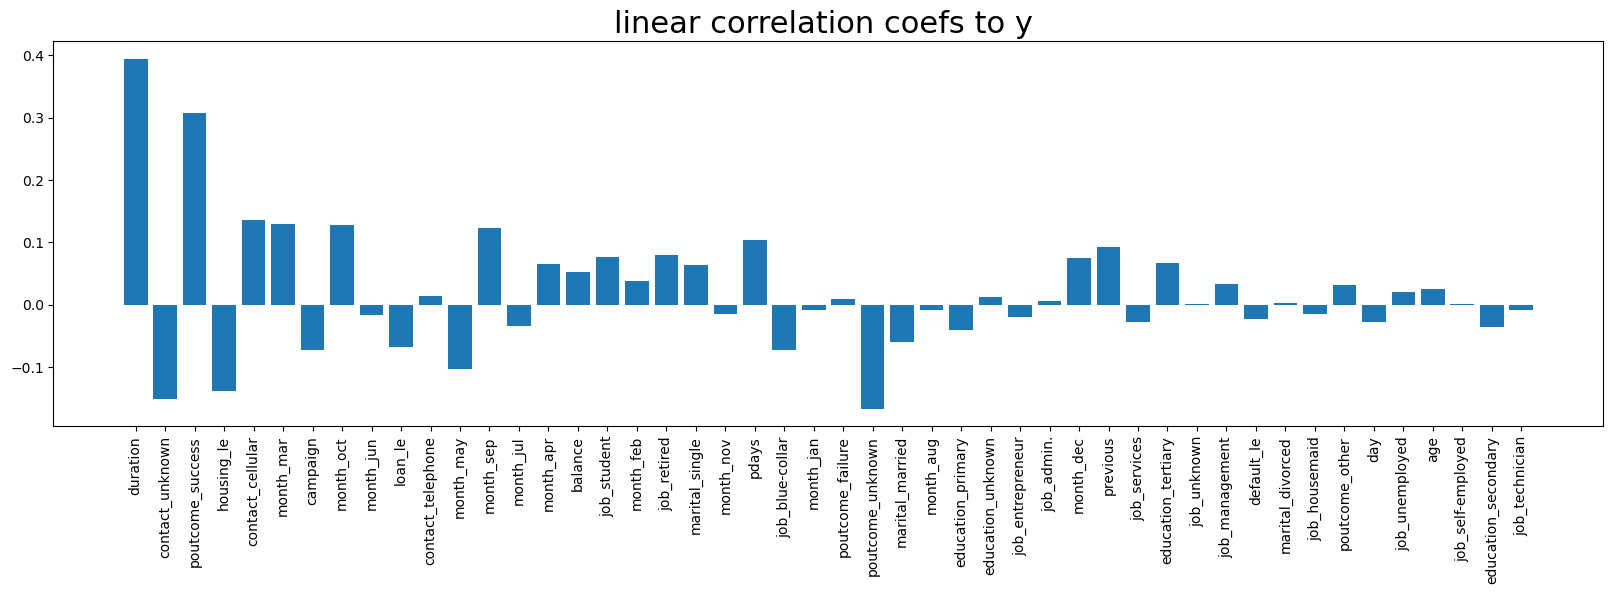

# 2. XGboost model: can reach pr_auc- cv_mean_max: 0.634, test_pr_auc: 0.645, better than Logistic regression (both pr_auc~ 0.54)!!!

In [86]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]



In [87]:
from xgboost import XGBClassifier



steps = [ ('rdt', RawDataTransformer()),
          ('xgb', XGBClassifier(random_state=31, 
                               # verbosity=3
                               ))
]


model = Pipeline(steps)

params ={

        'xgb__n_estimators': [   200 ],  #
        'xgb__learning_rate': [  #0.01, 0.005,
                            0.1,  #0.2
                              # 0.2 
                       ],  # 0.38
   #    'xgb__reg_alpha': [ 0, 1e5, 1e6, 3e6,],# best 1e6 2.72e10
   #     'xgb__reg_lambda': [0, 13, 15, 20 ] ,    # L2, regularization, best 0, 2.70e10

        'xgb__max_depth': [ 7, 5, 
                            3],  # 5 best, 2.69e10

         #  'xgb__max_features': [ None,   'sqrt', 'log2'] ,    # best log2


         # 'min_samples_leaf': [1,10, 20, 30 ], # 10 best,
         #'min_samples_split': [2,5, 10,15, 30],  #best 2, 0.51
         #'ccp_alpha': [0, 1e8, 1e9, 2e9 ], # best 1e8, 0.51

}


n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, 
                  params , 
                  cv=cv, 
                  #cv = 5, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1
                 )


grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x178247e50>),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      fea...
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=31, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.1],
                         'xgb__max_depth': [7, 5, 3],
                         'xgb__max_features': [None, 'sqrt', 'log2'],
                         'xgb__n_estimators': [200]},
             scoring='average_precision')

In [88]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.634


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

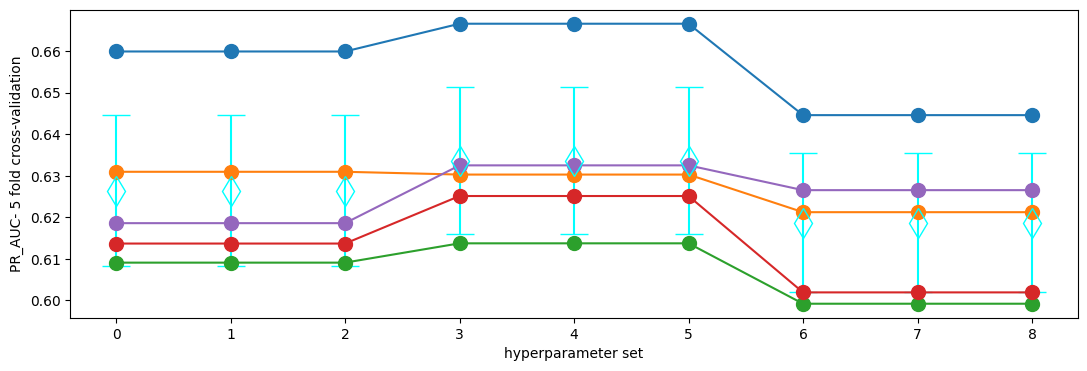

In [89]:
import matplotlib.pylab as plt
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [90]:
grid.best_params_

{'xgb__learning_rate': 0.1,
 'xgb__max_depth': 5,
 'xgb__max_features': None,
 'xgb__n_estimators': 200}

In [91]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.6445071642988303 0.9359487640628125


In [92]:
threshold

array([5.8529557e-05, 6.0904396e-05, 6.6647466e-05, ..., 9.6121323e-01,
       9.6931881e-01, 9.7149110e-01], dtype=float32)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.645')

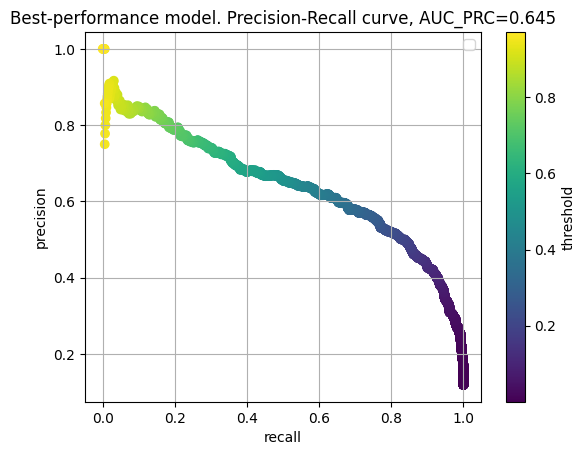

In [93]:

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.645')

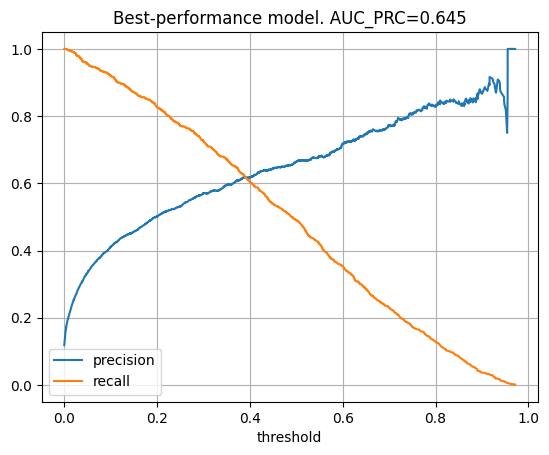

[22:53:10] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[22:53:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[22:53:48] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[22:53:10] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[22:53:25] WARNING: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/learner.cc:767: 
Parameters: { "max_features" } are not used.

[22:53:36] WARNING: /var/folders/nz/j6p8yfhx1mv_0g

In [94]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [71]:
# this is how to access individual steps and its attributes of GridSearchCV. 
grid.best_estimator_['xgb'].n_features_in_
#grid.best_estimator_['scale'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

48

In [72]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
9419,unemployed,married,secondary,no,no,no,unknown,jun,unknown,36,1453,6,386,1,-1,0
26837,admin.,married,secondary,no,yes,no,cellular,nov,unknown,31,2304,20,257,2,-1,0
25178,management,divorced,tertiary,no,no,no,cellular,nov,unknown,57,236,18,120,2,-1,0
17148,entrepreneur,married,tertiary,no,yes,no,cellular,jul,unknown,31,5156,28,147,3,-1,0
17412,blue-collar,single,unknown,no,yes,no,cellular,jul,unknown,38,-933,28,149,11,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,technician,single,unknown,no,no,no,unknown,jun,unknown,39,75,6,26,1,-1,0
11190,blue-collar,married,primary,no,no,no,unknown,jun,unknown,55,761,18,67,1,-1,0
26569,management,married,tertiary,no,no,no,cellular,nov,unknown,39,2450,20,382,2,-1,0
9256,technician,married,primary,no,yes,no,unknown,jun,unknown,51,223,5,131,3,-1,0


In [61]:
grid.best_estimator_['xgb'].n_features_in_

48

In [62]:
columns = features
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(grid.best_estimator_['lg'].coef_[0, :])), grid.best_estimator_['lg'].coef_[0, :]) 
plt.xticks(range(len(grid.best_estimator_['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables, final model')

NameError: name 'features' is not defined

[22:37:06] DEBUG: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/gbm/gbtree.cc:157: Using tree method: 2
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes,

# 3. Random Forest: can reach pr_auc- cv_mean_max: 0.62, test_pr_auc: 0.63, better than Logistic regression (both pr_auc~ 0.54), but a little bit less than XGBoost (0.634, 0.645)

In [95]:
# raw features, target
train['y_num'] = train.y.map(lambda x: 1 if x=='yes' else 0)
test['y_num'] = test.y.map(lambda x: 1 if x=='yes' else 0)


raw_features = cat_cols + num_cols
target = 'y_num'


X_train = train[raw_features]
y_train = train[target]

X_test = test[raw_features]
y_test = test[target]

In [138]:
from sklearn.ensemble import RandomForestClassifier


steps = [ ('rdt', RawDataTransformer()),
          ('rf', RandomForestClassifier())

]


model = Pipeline(steps)

params ={
        'rf__n_estimators': [ 250],  # 600 best r2_test=0.51
        'rf__max_features': [ #None,
                             'sqrt', #'log2'
                               ],     # best log2

        'rf__max_depth': [ 15,# 10, 5 # 5
                         ],  # 10 best
      #  'rf__min_samples_leaf': [#1,
        #                         3, 5, 7,  #10, #20, 30
        #                        ], # 10 best
         #'min_samples_split': [2,5, 8,  10, 20,30],  #best 2, 0.51
       #  'rf__ccp_alpha': [0, 1e6, 1e7, 1e8, ], # best 1e8, 0.51

}

n_splits = 5
cv = KFold(n_splits=n_splits, shuffle=True, random_state=42)

grid=GridSearchCV(model, 
                  params , 
                  cv=cv, 
                  #cv = 5, 
                  scoring = 'average_precision', # average_precision is pr_auc!!! #'roc_auc', 
                  n_jobs=-1)


grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rdt',
                                        <__main__.RawDataTransformer object at 0x169822b30>),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [15], 'rf__max_features': ['sqrt'],
                         'rf__n_estimators': [250]},
             scoring='average_precision')

In [139]:
cv_results = pd.DataFrame(grid.cv_results_)
print ('cv_results.mean_test_score.max(): %.3f'%cv_results.mean_test_score.max())
#for cumsun_threshold=1.0 (48 features).  cv_results.mean_test_score.max(): 0.552
#for cumsun_threshold=0.8 (21 features), cv_results.mean_test_score.max(): 0.549


cv_results.mean_test_score.max(): 0.620


Text(0, 0.5, 'PR_AUC- 5 fold cross-validation')

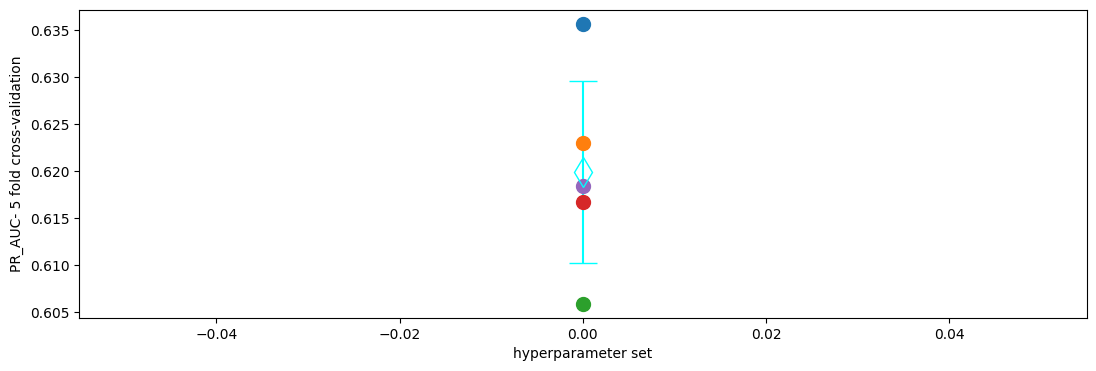

In [140]:
import matplotlib.pylab as plt
plt.figure(figsize=(13,4))
plt.errorbar(cv_results.index, cv_results.mean_test_score,
             yerr =cv_results.std_test_score,
             fmt='d' ,c='cyan', markersize=15, capsize=10, markerfacecolor='None'
            )

for i in range(n_splits):
    plt.scatter(cv_results.index, cv_results['split'+str(i)+'_test_score'], s=50)
    plt.plot(cv_results.index, cv_results['split'+str(i)+'_test_score'], markersize=10, marker='o')

plt.xlabel('hyperparameter set')
plt.ylabel('PR_AUC- 5 fold cross-validation')


In [141]:
grid.best_params_

{'rf__max_depth': 15, 'rf__max_features': 'sqrt', 'rf__n_estimators': 250}

In [142]:
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score

y_test_pred = grid.predict(X_test)

y_test_proba = grid.predict_proba(X_test)
y_test_proba1 = y_test_proba[ :, 1 ]
precision, recall, threshold = precision_recall_curve(y_test, y_test_proba1)
auc_prc = auc(recall, precision)
roc_auc = roc_auc_score(y_test, y_test_proba1)
print(auc_prc, roc_auc)
# #for cumsun_threshold=1.01.  0.5565234005522852 0.9100585723957852
# #for cumsun_threshold=0.8. 0.5505951871327397 0.9072211613681782

0.6288648247658242 0.9294862724966996


In [143]:
threshold

array([0.00190094, 0.00247979, 0.00262421, ..., 0.85794414, 0.86500708,
       0.86584639])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Best-performance model. Precision-Recall curve, AUC_PRC=0.629')

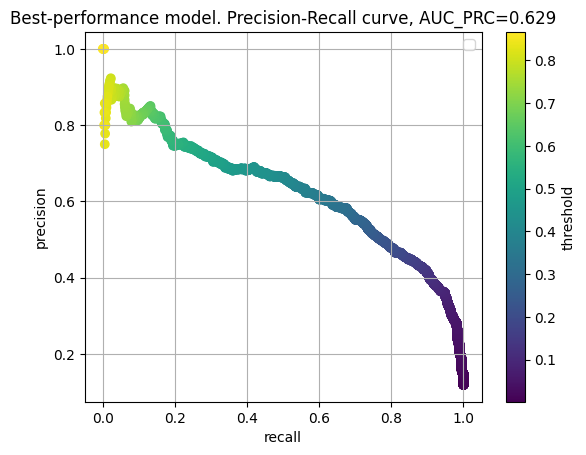

In [144]:

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
threshold1 = list(threshold)+ [threshold[-1]]
sc = plt.scatter(recall, precision, c=threshold1) #, label='my_calc')
cb = fig.colorbar(sc, label='threshold')

plt.legend()
plt.xlabel('recall')
plt.ylabel('precision')
plt.grid()
plt.title('Best-performance model. Precision-Recall curve, AUC_PRC=' + str(round(auc_prc,3)) )

Text(0.5, 1.0, 'Best-performance model. AUC_PRC=0.629')

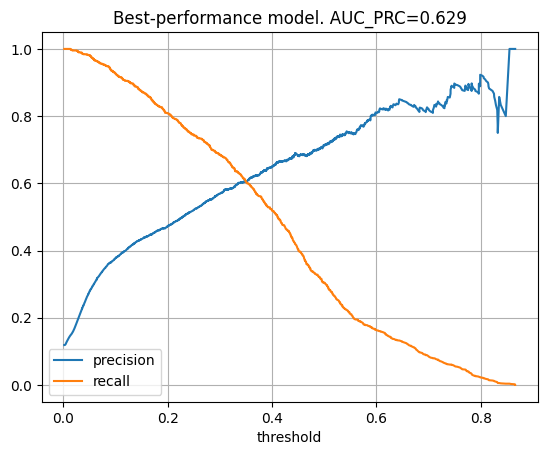

In [145]:
from sklearn.metrics import auc, precision_recall_curve

fig = plt.figure()
#plt.plot(recall, precision, label='from sklearn')
plt.plot(threshold1, precision, label='precision')
plt.plot(threshold1, recall, label='recall')       

plt.legend()
plt.xlabel('threshold')
plt.grid()
plt.title('Best-performance model. AUC_PRC=' + str(round(auc_prc,3)) )

In [110]:
# this is how to access individual steps and its attributes of GridSearchCV. 
grid.best_estimator_['xgb'].n_features_in_
#grid.best_estimator_['scale'].feature_names_in_
#grid.best_estimator_['lg'].feature_names_in_ # becaus of using standardscaler, it returns an array instead of dataframe, so feature_names are lost.

KeyError: 'xgb'

In [72]:
X_train

,job,marital,education,default,housing,loan,contact,month,poutcome,age,balance,day,duration,campaign,pdays,previous
9419,unemployed,married,secondary,no,no,no,unknown,jun,unknown,36,1453,6,386,1,-1,0
26837,admin.,married,secondary,no,yes,no,cellular,nov,unknown,31,2304,20,257,2,-1,0
25178,management,divorced,tertiary,no,no,no,cellular,nov,unknown,57,236,18,120,2,-1,0
17148,entrepreneur,married,tertiary,no,yes,no,cellular,jul,unknown,31,5156,28,147,3,-1,0
17412,blue-collar,single,unknown,no,yes,no,cellular,jul,unknown,38,-933,28,149,11,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9704,technician,single,unknown,no,no,no,unknown,jun,unknown,39,75,6,26,1,-1,0
11190,blue-collar,married,primary,no,no,no,unknown,jun,unknown,55,761,18,67,1,-1,0
26569,management,married,tertiary,no,no,no,cellular,nov,unknown,39,2450,20,382,2,-1,0
9256,technician,married,primary,no,yes,no,unknown,jun,unknown,51,223,5,131,3,-1,0


In [61]:
grid.best_estimator_['xgb'].n_features_in_

48

In [62]:
columns = features
from matplotlib.pylab import plt
fig = plt.figure(figsize=(15,5))
plt.bar(range(len(grid.best_estimator_['lg'].coef_[0, :])), grid.best_estimator_['lg'].coef_[0, :]) 
plt.xticks(range(len(grid.best_estimator_['lg'].coef_[0, :])), columns, rotation=90)
plt.ylabel('model coefs')
plt.title('all variables, final model')

NameError: name 'features' is not defined

[22:37:06] DEBUG: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/gbm/gbtree.cc:157: Using tree method: 2
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes, max_depth=3
[22:37:06] INFO: /var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_21wtzqx5vy/croot/xgboost-split_1675457780668/work/src/tree/updater_prune.cc:98: tree pruning end, 14 extra nodes, 0 pruned nodes,

## other to-do:
## -- decide on metrics - prc_auc. 
## -- tp, fp, tn, fn calculation.  --  done
## -- add both numeric and categorical variables - done
## -- chossing threshold for Logistic regression - done.

## -- ROC curve, ROC_AUC. -- done
## -- read notebook of logistic regression. -- done.
## -- remove unimportant features, see if results improve. -- done. wouldn't improve. 
## -- what are the hyperparameters, fine-tune them and use gridsearchcv  to find best scores. -- done
## -- use the whole train and test data set
## -- pca?  tried, having fewer n_components would not help with the score (pr_auc). 
## -- smote for imbalanced class? tried for this dataset, using smote did not make it better


## would take logs of some numeric variables help?
## -- SHAP?  exact calulator is too much calculation, using an estimator? do we need shap in a linear model like logistic regression? 
## -- svm, random forest, cnn, naive bayes.
## -- evaluate best models
## -- recommendations to product manager. what are important features? which customer groups to further post ads. 
## -- iterative? 

## Conclusion:
## -- metric: auc_prc.  this is most fair for imbalanced data, and is not threshold-dependent.
## when using all variables it get the best, though no improvement after n>~21 features (ranked by coeffients).

## summary:
-- streamline machinary: 
   -- how many numeric variables? how many categorical? 
   -- how many missing values? what to do with them?  missing values analysis. coliniarity for numeric variables. 
   -- EDA: 
       -- imbalanced data type? 
       -- numeric variables: 
          -- univariate analysis: histogram (density plot) for the two target class. 
          -- multivariate analysis: correlation checks (colinearity).  
       -- for categorical variables:
          -- univariate analysis: bar plot, for the two target class. 
          -- multivariate analysis: correlation checks (colinearity).   ??? try do it? 
   -- DATA cleaning:
        -- for missing values: remove colums not so  informative? imputing? 
        -- for binary variables:  if one group is very infrequent. remove the column. 
        -- multiclass categorical variables: 
        -- for numeric variables. take logs?  remove features due to colinearity? 
        -- for categorical variables [one hot encoding, ordinal encoding, target encoding(k-fold, leave-on-out)]: group less frequent variables?(ordinal encoding can automatically do this) binary: ordinal encoding. obvious ordinal: ordinal encoding? multiclass but not so ordinal: one-hot encoding? what if too many values? group, use len, target encoding.  
        
   -- ML: 
       -- metric. benchmark. 
       -- for imbalanced data: try class_weight = balanced? upsampling/downsampling/SMOTE?   - may not need to decide at the beginning
       -- split samples into train & test
       -- futher split the train into train + validation
       -- simplest model to go through. no tune of hyperparameters. look at metric: any improvement from benchmark?
             - build a pipeline
           -- imputing
           -- data transformer: encoding
           -- feature selection - no need to do this in the beginning
           -- SCALE! 
           -- (pca)  try switch this on and off after the whole model is built.
           -- ML model. 
       -- if better than the benchmark, use gridsearchCV to finetune parameters and find best model for the metric.
       -- look at the feature importance (& compare with EDA). does it make sense? 
       
       -- try other models and use gridsearchCV to finetune parameters, 
       
       
       -- compare cv_mean_max_score to decide what final model to use.
       -- train the data set. predict the test dataset. evaluate generalizability. 
 
-- summary: 
   -- best model: how much better metrics compared to bench mark? 
   -- findings from the EDA: important features.  
 
-- notes:


## Q: 
## -- why both using only numeric or only categorical variables ended up having very similar precision?  
## -- would reducing unimportant features help with the score? using the score of auc-prc
## Is it worth the time fine-tuning it? 
## -- should I use PCA here? would it help?

## what threshold to choose? what does it (and relatd precision, recall score) mean? 